# Quick look at NEMO Baltic Sea forecast data

The `BALTICSEA_ANALYSISFORECAST_PHY_003_006` is a product provided by the Copernicus Marine Environment Monitoring Service (CMEMS) that provides analysis and forecast data for the Baltic Sea region. The product is updated twice a day and provides a six-day forecast.

The data assimilation system used for the product combines physical models with observations from various sources, including satellite data. The satellite data used in the assimilation process includes sea surface temperature, sea surface height, and ocean color.

The product can be useful for planning a cruise to sample the front between the Skagerrak and Kattegat seas as it provides information on water temperature, salinity, and currents. This information can be helpful in identifying areas of interest for further investigation and optimizing sampling locations.

[Find it here](https://data.marine.copernicus.eu/product/BALTICSEA_ANALYSISFORECAST_PHY_003_006/services)

In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from cmocean import cm as cmo  
import numpy as np

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

def gridlines(ax,lon_tick,lat_tick):
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      x_inline=False, y_inline=False,
                      linewidth=0.75, alpha=0.5, linestyle='--',color='w',
                      ylocs = mpl.ticker.MultipleLocator(base=lat_tick),xlocs = mpl.ticker.MultipleLocator(base=lon_tick))
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    gl.xpadding=10
    gl.ypadding=10

## Load the data

In [2]:
# Read in the multifile dataset, and subset to only contain Skagerrak and Kattegat
ds = xr.open_mfdataset('/Users/xedhjo/Documents/Projects/OC4920/data/Baltic Sea/BAL-NEMO_PHY/*.nc')
ds = ds.sel(lon=slice(7,15),lat=slice(54,60)) # If you'd like to do analysis on the Baltic, then comment out this line

Let's take a look at the different variables we have to work with

In [8]:
list(ds.keys())

for key in list(ds.keys()):
    print('\033[1m' + key + '\033[0m' + ': ' + ds[key].attrs['long_name'])

thetao: potential temperature
so: salinity
uo: Eastward current
vo: Northward current
wo: Upward current
bottomT: Sea water potential temperature at sea floor (given for depth comprise between 0 and 500m)
sob: Sea water salinity at sea floor
sla: Sea level elevation
sithick: Sea ice thickness
siconc: Sea ice cover
mlotst: Ocean mixed layer thickness defined by density (as in de Boyer Montegut, 2004)


## Plotting

Now that we know what we have, let's take a quick look at one random day

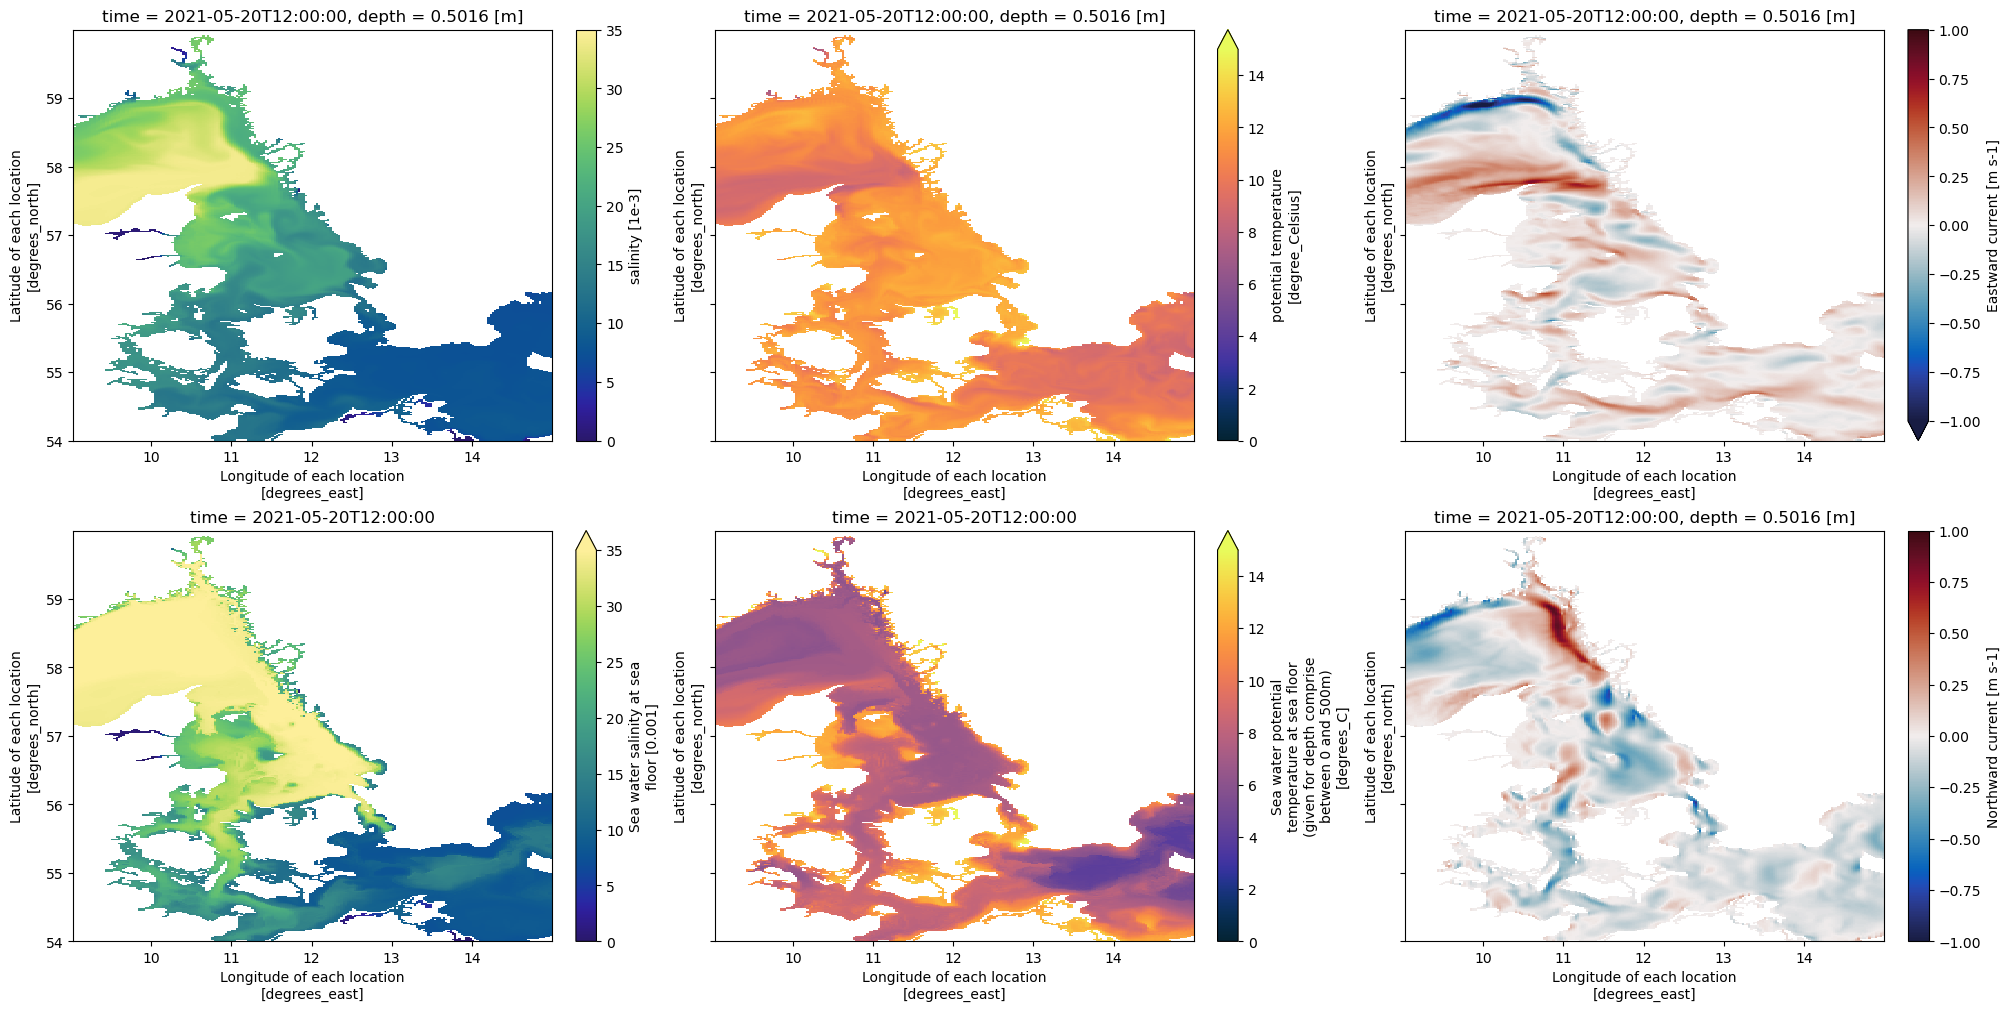

In [24]:
# We make a figure with six subplots, to plot temperature, salinity, and velocities
i = 2 # Columns
j = 3 # Rows
fig, ax = plt.subplots(i,j,figsize=(20,10),sharey=True,constrained_layout=True)

n = np.random.randint(0,len(ds.time))

# To make the looping easier, we flatten the ax-variable (To go from ax[i][j] to ax[i*j])
ax = ax.T.flatten()

var = ['so','sob','thetao','bottomT','uo','vo']
cmaps = [cmo.haline,cmo.haline,cmo.thermal,cmo.thermal,cmo.balance,cmo.balance]
vmins = [0,0,0,0,-1,-1]
vmaxs = [35,35,15,15,1,1]

for i in range(6):
    if len(ds[var[i]].dims) > 3:
        ds.isel(time=n,depth=0)[var[i]].plot(ax=ax[i],vmin=vmins[i],vmax=vmaxs[i],cmap=cmaps[i])
    else:
        ds.isel(time=n)[var[i]].plot(ax=ax[i],vmin=vmins[i],vmax=vmaxs[i],cmap=cmaps[i])

# Can you think of a better way to show the currents and salinity at the same time?

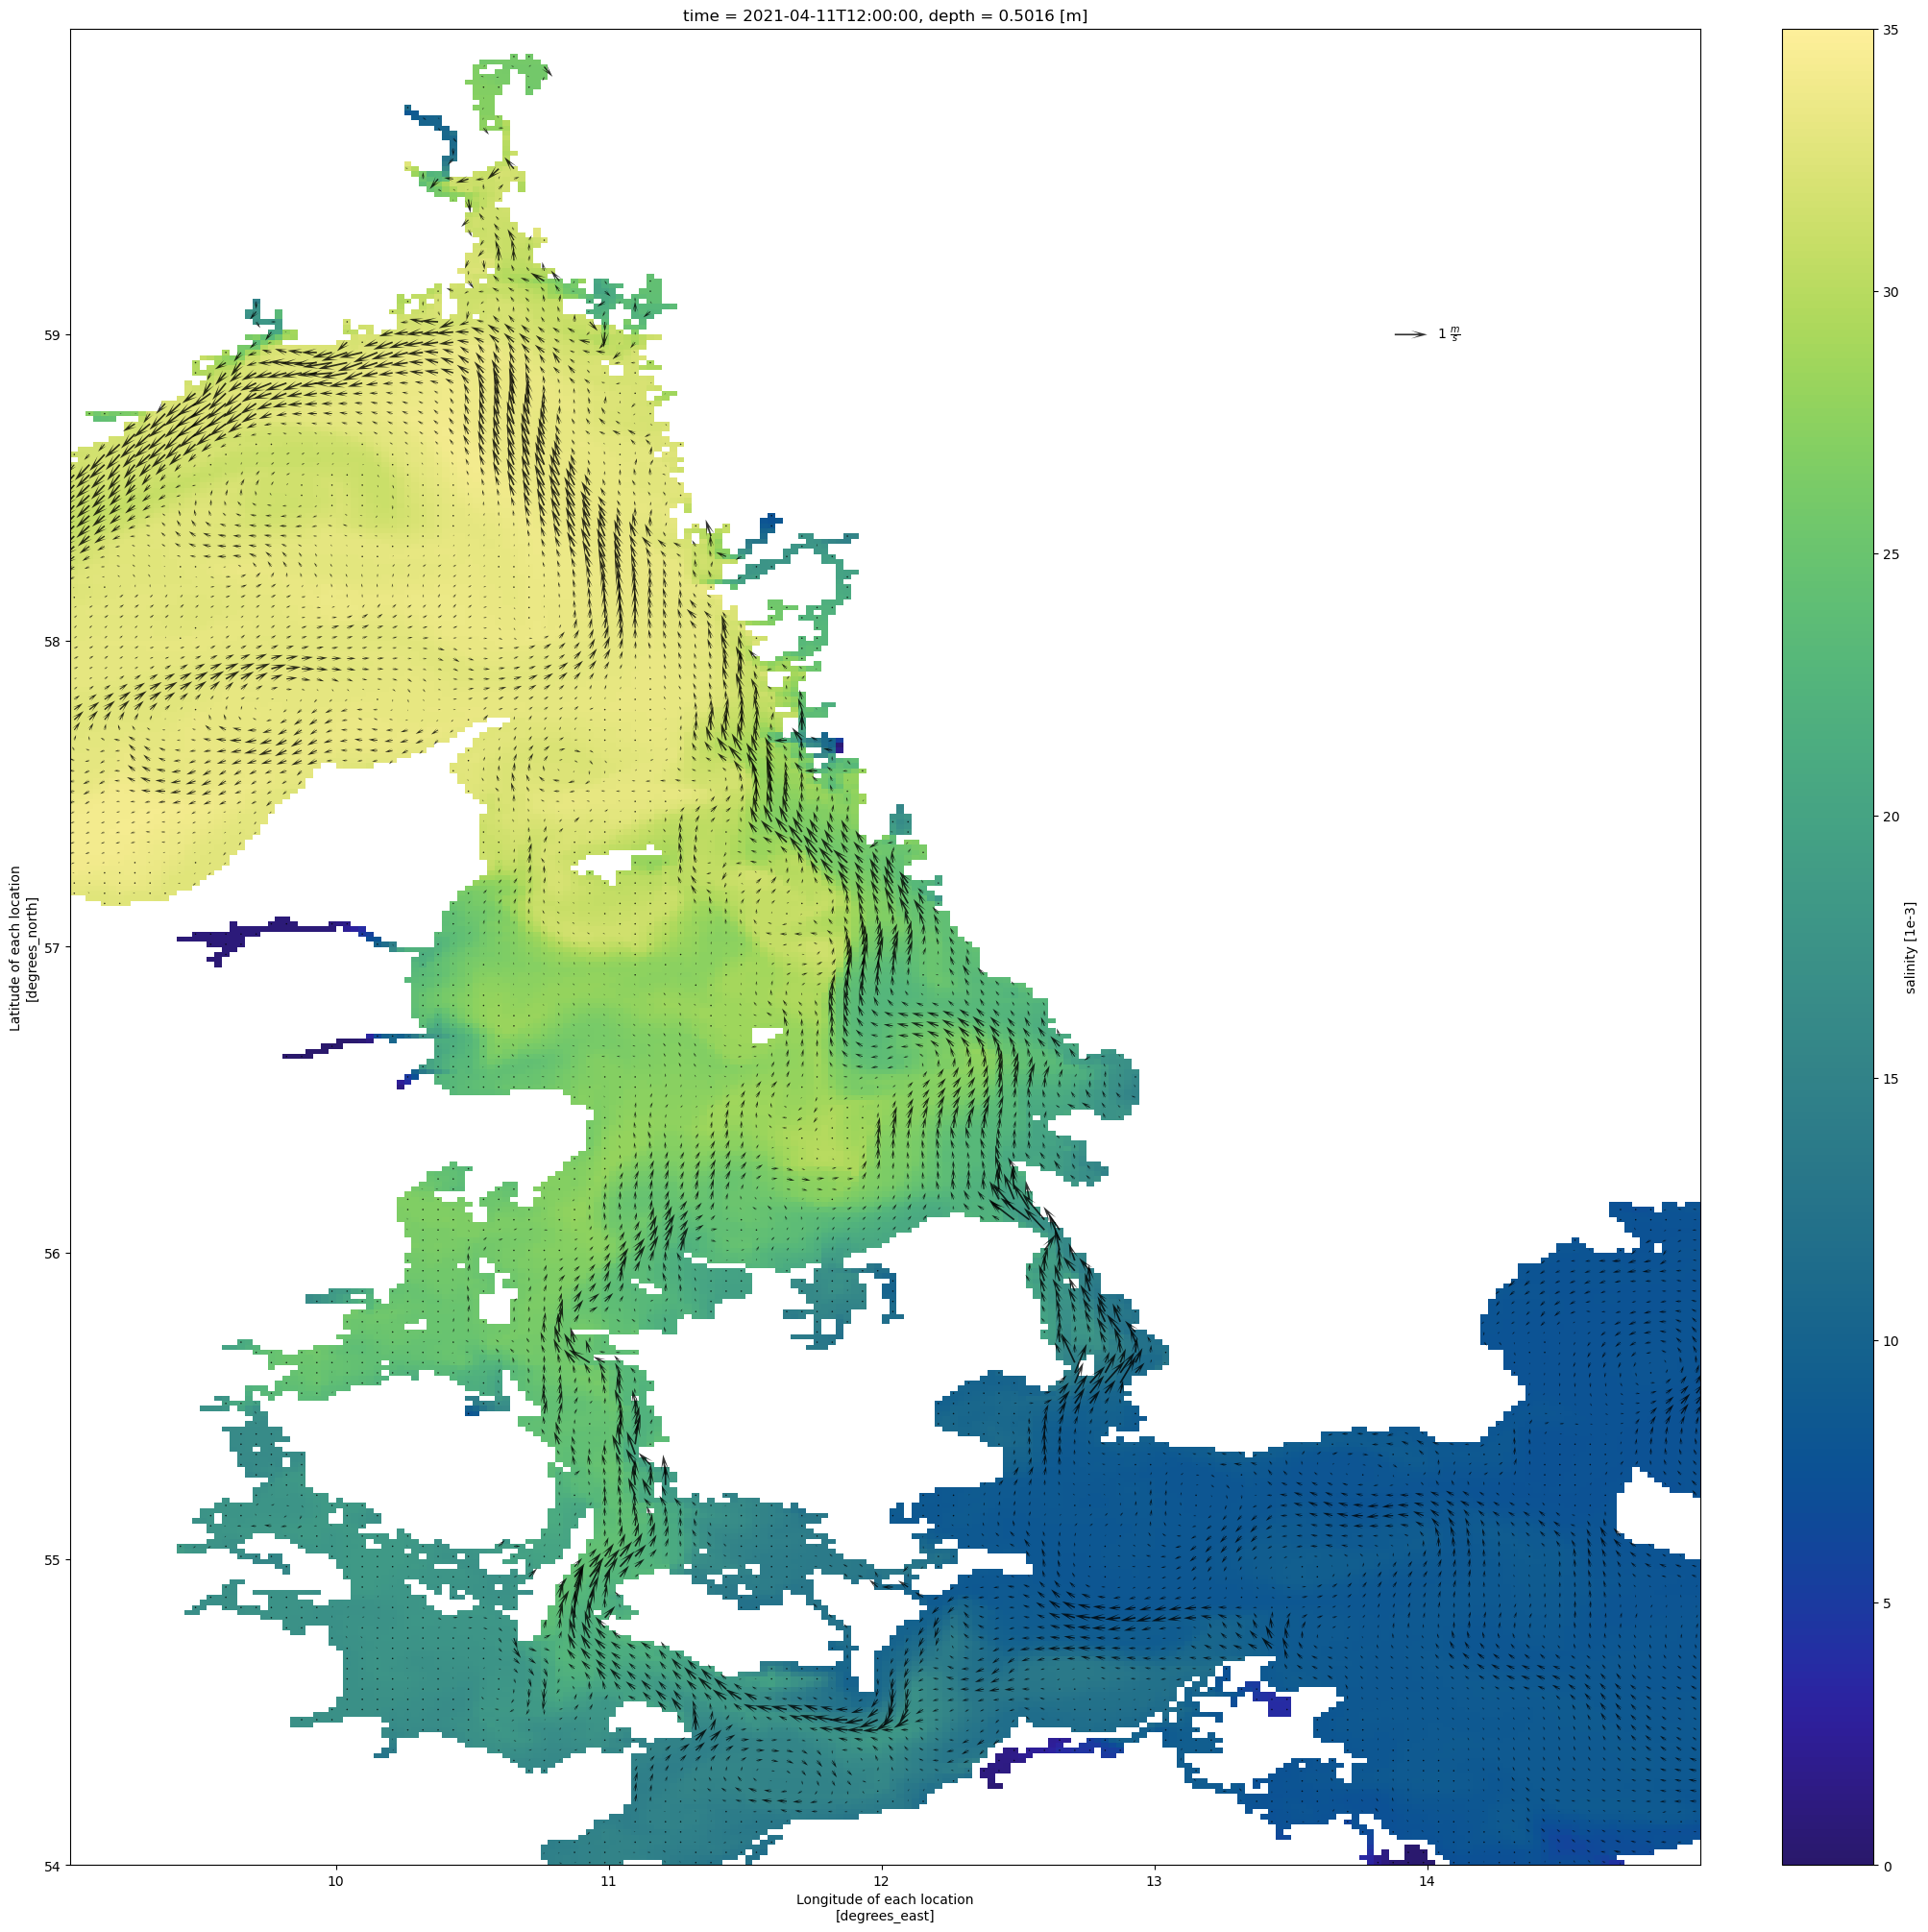

In [44]:
fig, ax = plt.subplots(1,1,figsize=(20,20),constrained_layout=True)

n = 2
ds.isel(time=10,depth=0)['so'].plot(ax=ax,vmin=0,vmax=35,cmap=cmo.haline)

q = ax.quiver(ds['lon'][::n],
              ds['lat'][::n],
              ds.isel(time=10,depth=0)['uo'][::n,::n],
              ds.isel(time=10,depth=0)['vo'][::n,::n],
              color='k',scale=50, alpha=0.8, headaxislength=5, headlength=10, headwidth=5, width=1e-3)

qk = ax.quiverkey(q, 14, 59, 1, r'1 $\frac{m}{s}$', labelpos='E',coordinates='data',zorder=100)